### Exploring Race Population Data

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
raw = pd.read_csv('raw_race_data.csv')
cleaned = pd.read_csv('census_race_cleaned.csv')

In [3]:
raw.head(1)

,Zip_Code,Population,White,Black,Native_American,Asian,Hawaiian_Pacific_Islander,Other,Latino,Mixed_Race
0,601,17599,59,0,7,0,0,0,17533,0


In [4]:
cleaned.head(1)

,Zip_Code,City,State,Population,Density,White,Black,Native_American,Asian,Hawaiian_Pacific_Islander,Other,Latino,Mixed_Race
0,601,Adjuntas,Puerto Rico,17599,111.4,0,0,0,0,0,0,100,0


---

#### (1) Total Population

In [5]:
totals = []
for race in raw.columns[2:]:
    totals.append(raw[race].sum())

In [6]:
raw_df = pd.DataFrame({'Race': raw.columns[2:], 'Population':totals})
raw_df['Percentage'] = round(raw_df['Population']/sum(totals), 3) * 100
raw_df = raw_df.sort_values('Population', ascending=False).reset_index(drop=True)

In [7]:
raw_df

,Race,Population,Percentage
0,White,197297627,59.4
1,Latino,59937295,18.1
2,Black,39446532,11.9
3,Asian,16991359,5.1
4,Mixed_Race,14908034,4.5
5,Native_American,2098329,0.6
6,Other,717286,0.2
7,Hawaiian_Pacific_Islander,515485,0.2


In [8]:
raw_df['Population'].sum()

331911947

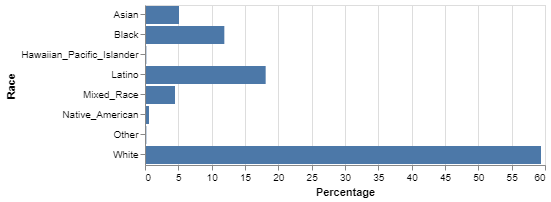

In [9]:
alt.Chart(raw_df).mark_bar().encode(
x='Percentage',
y='Race').properties(background='white')

---

#### (2) Number of Zip Codes Where a Race Group is the Majority

In [10]:
majority = []
states = []
for race in cleaned.columns[5:]:
    df = cleaned[cleaned[race] > 50]
    majority.append(len(df))
    states.append(len(df.State.unique()))

In [11]:
cleaned_df = pd.DataFrame({'Race': cleaned.columns[5:], 'Majority_Zips':majority, 'States':states}).sort_values('Majority_Zips', ascending=False)

In [12]:
cleaned_df['Maj_Per'] = round(cleaned_df['Majority_Zips'] / len(cleaned), 4) * 100

In [13]:
cleaned_df

,Race,Majority_Zips,States,Maj_Per
0,White,27437,52,82.84
6,Latino,1389,33,4.19
1,Black,1195,32,3.61
2,Native_American,332,21,1.00
3,Asian,52,8,0.16
7,Mixed_Race,35,21,0.11
5,Other,2,2,0.01
4,Hawaiian_Pacific_Islander,1,1,0.00
